## This notebook shows how vadarsentiment was used to analyse and extract sentiment from apple reviews data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing libraries

In [2]:
import pandas as pd
import os
import sys
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Below are pecialised libraries that deal with text processing.

import re
# gensim is a library for text processing including n-gram models
import gensim
from gensim.utils import simple_preprocess
# spacy is also for text processing, here we are using the lemmatiser
import spacy
# This package draws word clouds, as a form of frequency analysis
import wordcloud

## Import the dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/APPLE_reviews.csv')

In [4]:
df

,title,Reviews,Country
0,Best Laptop in History,I got my new MacBook Pro M1 two weeks ago and ...,UK
1,"MacBook Pro 13 with M1 chip, 16 Gb memory",I bought my Mac from Apple directly not from A...,UK
2,Amazing,I own over 50 computers and it blows away my 1...,UK
3,I love my Mac,It's a Mac once you go Mac you never go back. ...,UK
4,Hmmm...,Dead at arrival.... kernel error. Took it to t...,UK
...,...,...,...
4053,NaN,"Too big, too heavy",US
4054,NaN,Fantastic laptop,US
4055,NaN,No. trash,US
4056,NaN,Display issues… AGAIN,US


## Text Cleaning

In [5]:
df = df.drop('title', axis = 1)

In [6]:
df = df.rename(columns={'Reviews': 'review'})

In [7]:
print('The shape of the dataframe is ', df.shape)
df.head()

The shape of the dataframe is  (4058, 2)


,review,Country
0,I got my new MacBook Pro M1 two weeks ago and ...,UK
1,I bought my Mac from Apple directly not from A...,UK
2,I own over 50 computers and it blows away my 1...,UK
3,It's a Mac once you go Mac you never go back. ...,UK
4,Dead at arrival.... kernel error. Took it to t...,UK


In [8]:
# Remove punctuation
df['review'] = df['review'].apply(str).map(lambda x: re.sub('[^a-zA-Z]',
' ', x))
# df['review'] = df['review'].apply(str).map(lambda x: re.sub('[^a-zA-Z]',
# ' ', x)) #Adding another layer of characters to be removed
# Convert the titles to lowercase
df['review'] = df['review'].apply(str).map(lambda x: x.lower())
# Print out the first rows of reviews
print(df['review'].apply(str).head())

0    i got my new macbook pro m  two weeks ago and ...
1    i bought my mac from apple directly not from a...
2    i own over    computers and it blows away my  ...
3    it s a mac once you go mac you never go back  ...
4    dead at arrival     kernel error  took it to t...
Name: review, dtype: object


In [9]:
len(df['review'])

4058

In [10]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False)) #deacc=True removes punctuations
        #data = imdb_df['review'].tolist()
data = df['review'][0:4058].tolist()
data_words = list(sent_to_words(data))
print('data_words[:1]', data_words[:1])

data_words[:1] [['got', 'my', 'new', 'macbook', 'pro', 'two', 'weeks', 'ago', 'and', 'could', 'not', 'be', 'more', 'happy', 'with', 'it', 'this', 'machine', 'is', 'absolutely', 'incredible', 'in', 'terms', 'of', 'speed', 'looks', 'weight', 'size', 'display', 'and', 'battery', 'life', 'and', 'texture', 'it', 'feels', 'so', 'good', 'against', 'the', 'skin', 'on', 'my', 'wrists', 'as', 'type', 'and', 'basically', 'anything', 'else', 'you', 'can', 'think', 'of', 'also', 'love', 'the', 'space', 'gray', 'color', 'the', 'new', 'keyboard', 'the', 'touch', 'bar', 'and', 'the', 'larger', 'trackpad', 'there', 'are', 'so', 'many', 'options', 'to', 'customize', 'the', 'system', 'to', 'work', 'just', 'the', 'way', 'like', 'my', 'previous', 'macbook', 'was', 'the', 'model', 'and', 'it', 'still', 'works', 'today', 'but', 'after', 'years', 'it', 'became', 'too', 'slow', 'and', 'the', 'trackpad', 'had', 'trouble', 'clicking', 'so', 'after', 'ton', 'of', 'research', 'decided', 'to', 'pull', 'the', 'trigg

In [11]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()

def vadar_sentiment(text):
    """ Calculate and return the nltk vadar (lexicon method) sentiment """
    return sent.polarity_scores(text)['compound']

# create new column for vadar compound sentiment score
df['vadar compound'] = df['review'].apply(vadar_sentiment)

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [13]:
def categorise_sentiment(sentiment, neg_threshold=-0.05, pos_threshold=0.05):
    """ categorise the sentiment value as positive (1), negative (-1) 
        or neutral (0) based on given thresholds """
    if sentiment > pos_threshold:
        label = 'positive'
    else:
        label = 'negative'
    return label

# new col with vadar sentiment label based on vadar compound score
df['sentiment'] = df['vadar compound'].apply(categorise_sentiment)

In [14]:
df.head()

,review,Country,vadar compound,sentiment
0,i got my new macbook pro m two weeks ago and ...,UK,0.9960,positive
1,i bought my mac from apple directly not from a...,UK,0.9440,positive
2,i own over computers and it blows away my ...,UK,0.8779,positive
3,it s a mac once you go mac you never go back ...,UK,0.0000,negative
4,dead at arrival kernel error took it to t...,UK,-0.7964,negative


No handles with labels found to put in legend.


positive    2877
negative    1181
Name: sentiment, dtype: int64


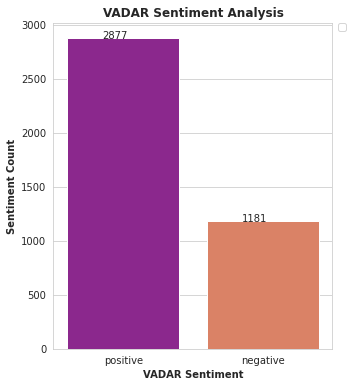

In [21]:
# plot distribution of article sentiments for each newspaper
print(df['sentiment'].value_counts())
plt.figure(figsize=(5,6))
ax = sns.countplot(x='sentiment', data = df, palette = 'plasma')
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.title('VADAR Sentiment Analysis', weight='bold')
plt.ylabel('Sentiment Count', fontsize=10, weight='bold')
plt.xlabel('VADAR Sentiment', fontsize=10, weight='bold')

plt.legend(bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=0.0)
plt.show()

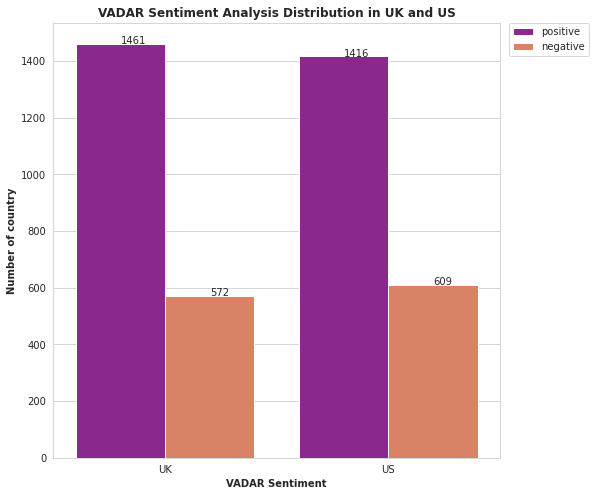

In [20]:
# plot distribution of article sentiments for each newspaper
plt.figure(figsize=(8,8))
ax = sns.countplot(x='Country', data = df, hue='sentiment', palette = 'plasma')
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.20, p.get_height()+0.01)) 
plt.title('VADAR Sentiment Analysis Distribution in UK and US', weight='bold')
plt.ylabel('Number of country', fontsize=10, weight='bold')
plt.xlabel('VADAR Sentiment', fontsize=10, weight='bold')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=0.0)
plt.show()

In [ ]:
# save data with sentiment to csv file
#df.to_csv('appledata_sentiment')